#Name: Ramya Banda
#ECE 595 Machine Learning II
#Project 3: GAN - Code

In [ ]:
#Import necessary packages
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.models import load_model
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf

Using TensorFlow backend.


#Part 1: Implementing the GAN

11501568/11490434 [==============================] - 1s 0us/step


W1029 22:10:43.360459 140526256265088 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1029 22:10:43.371798 140526256265088 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1029 22:10:43.379575 140526256265088 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1029 22:10:43.448858 140526256265088 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1029 22:10:43.496450 140526256265088 module_wrapper.py:139] From /usr/local

Epoch 10000
10000: [Discriminaotr loss: 0.561199, acc: 0.425781]  [GAN loss: 1.348618, acc: 0.156250]


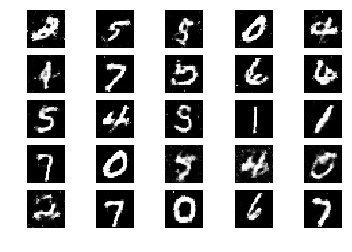

Epoch 20000
20000: [Discriminaotr loss: 0.571570, acc: 0.420898]  [GAN loss: 1.686569, acc: 0.048828]


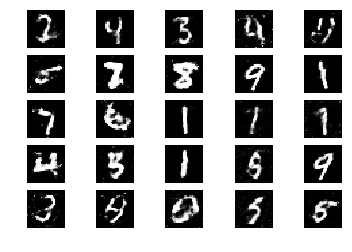

Epoch 30000
30000: [Discriminaotr loss: 0.591027, acc: 0.468750]  [GAN loss: 0.950413, acc: 0.345703]


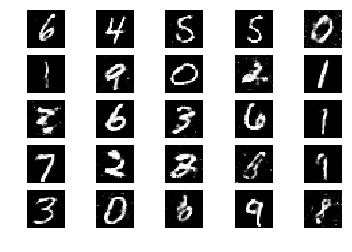

Epoch 40000
40000: [Discriminaotr loss: 0.567149, acc: 0.365234]  [GAN loss: 1.819348, acc: 0.060547]


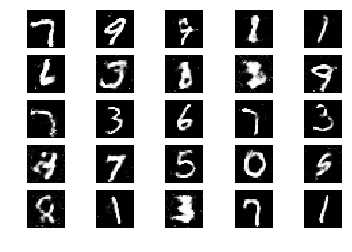

Epoch 50000
50000: [Discriminaotr loss: 0.536718, acc: 0.425781]  [GAN loss: 1.401541, acc: 0.152344]


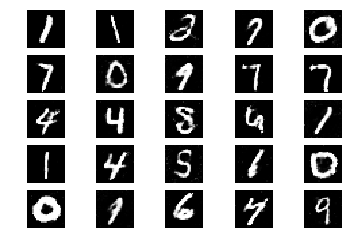

Epoch 60000
60000: [Discriminaotr loss: 0.534569, acc: 0.407227]  [GAN loss: 1.647632, acc: 0.091797]


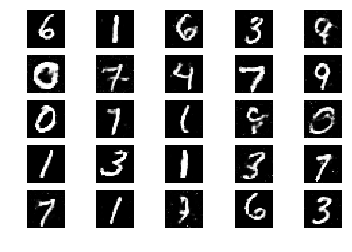

Epoch 70000
70000: [Discriminaotr loss: 0.533170, acc: 0.412109]  [GAN loss: 1.586092, acc: 0.125000]


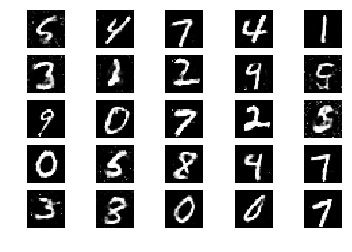

Epoch 80000
80000: [Discriminaotr loss: 0.528315, acc: 0.425781]  [GAN loss: 1.549623, acc: 0.134766]


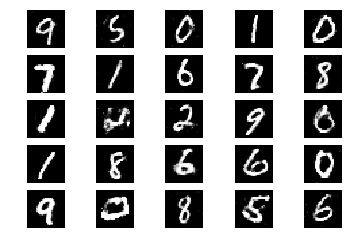

Epoch 90000
90000: [Discriminaotr loss: 0.523076, acc: 0.423828]  [GAN loss: 1.741605, acc: 0.091797]


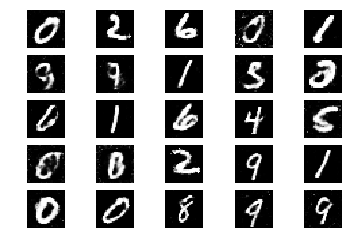

Epoch 100000
100000: [Discriminaotr loss: 0.545155, acc: 0.377930]  [GAN loss: 1.537071, acc: 0.142578]


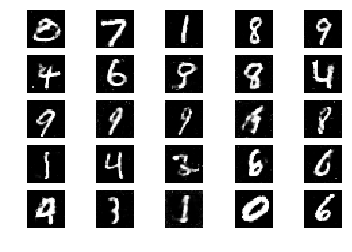

In [ ]:
#Load MNIST data and normalize to [-1, 1]

(data_train, _), (data_test, _) = mnist.load_data()
data_train = ((data_train/255.0)*2)-1
data_test = ((data_test/255.0)*2)-1

data_train = data_train.reshape(60000, 784)
data_test = data_test.reshape(10000, 784)

# The D-dimensional noise vector length
latent_dim = 100

data_dim = 784

# Optimizer for discriminator, which will have a higher learning rate than adversarial model
def adam_optimizer():
    
  return adam (lr=0.0002, beta_1=0.5, beta_2=0.999)

def gan_optimizer():
  return adam(lr=0.001, beta_1=0.9, beta_2=0.999)

#def accuracy(y_pred, y_true):
#	return K.mean(K.equal(K.round(y_true), K.round(y_pred)))
 

# Genrerator model
def create_generator():
    
  generator=Sequential()
  generator.add(Dense(300,input_dim=latent_dim))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(600))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(1200))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(data_dim, activation='tanh'))
  generator.compile(loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05),optimizer=adam_optimizer())
  return generator


# Discriminator model
def create_discriminator():
   
  discriminator=Sequential()
  discriminator.add(Dense(1200,input_dim=data_dim))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.30))
  discriminator.add(Dense(600))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.30))
  discriminator.add(Dense(300))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dense(units=1,activation='sigmoid'))
  discriminator.compile(loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05),optimizer=adam_optimizer(),metrics=['accuracy'])
  return discriminator

# Create adversarial model
def create_gan(discriminator, generator):
   
  discriminator.trainable= False
  gan_input = Input(shape=(latent_dim,))
  x = generator(gan_input)
  gan_output = discriminator(x)
  gan = Model(inputs=gan_input , outputs=gan_output)
  gan.compile(loss= tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05), optimizer=gan_optimizer(),metrics=['accuracy'])
  #gan.compile(loss= 'binary_crossentropy', optimizer=gan_optimizer(),metrics=['accuracy'])
  return gan

# Creating GAN
generator = create_generator()
discriminator = create_discriminator()
gan = create_gan(discriminator, generator)


# Model and training parameters

epochs = 100000
batch_size = 512
sample_interval = 10000
#check_interval = 100

# Array to save training history
training_meta_data = np.zeros([epochs, 4])

# Training the GAN
for e in range(1, epochs+1):

    # Generate random noise as input
    
  noise=np.random.normal(loc=0.0, scale=1.0, size=([batch_size, latent_dim]))
  
    # Generate fake MNIST images from generated noise
    
  fake_images = generator.predict(noise)
  
    # Get a random set of real MNIST images
   
  real_image_indices = np.random.choice(60000, size= batch_size, replace=False)
  real_images = data_train[real_image_indices]
  
    # Concatenate real and fake images into a single array (or batch)
   
  data_total = np.concatenate((real_images, fake_images),axis=0)

  
  #labels_real = np.ones(batch_size)
  labels_real=np.full((batch_size,), 0.9)
  #print(labels_real.shape)
  labels_fake = np.zeros(batch_size)
  #print(labels_fake.shape)
  labels_discriminator = np.concatenate((labels_real,labels_fake),axis=0)
  
    # Allow discriminator parameters to be updated
   
  discriminator.trainable = True
  
    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
  
  d_loss = np.empty(2)
  d_loss[0], d_loss[1] = discriminator.train_on_batch(data_total,labels_discriminator)
    
    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data

  noise=np.random.normal(loc=0.0, scale=1.0, size=([batch_size, latent_dim]))
  labels_generator = np.ones(batch_size)
  #labels_generator=np.full(batch_size, 0.9)

  
    # Keep discriminator weights constant while training generator

  discriminator.trainable = False
  
    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable

  gan_loss = np.empty(2)
  gan_loss[0], gan_loss[1] = gan.train_on_batch(noise,labels_generator)
  
    # Save training status
    # Discriminator and model loss
  training_meta_data[e-1, 0] = d_loss[0]
  training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
  training_meta_data[e-1, 2] = d_loss[1]
  training_meta_data[e-1, 3] = gan_loss[1]


    # If at sample interval, print training status and save samples
#  if e % check_interval == 0:
#    percent_complete = (e/100000)*100
#    print("%d percent complete, %i epochs completed out of 100000" % (percent_complete, e))


  # If at sample interval, print training status and save samples
  if e % sample_interval == 0:
    
      # Print training status
      print("Epoch %d" %e)
      log_mesg = "%d: [Discriminaotr loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
      log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
      print(log_mesg)
      
      # Plot images 
      r, c = 5, 5

      # Create images from the noise (predict the outcome of the noise)
      gen_imgs = generator.predict(noise)

      # Rescale images 0 - 1
      gen_imgs = 0.5 * gen_imgs + 0.5

      fig, axs = plt.subplots(r, c)
      cnt = 0
      for i in range(r):
          for j in range(c):
              axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
              axs[i,j].axis('off')
              cnt += 1
      plt.show()

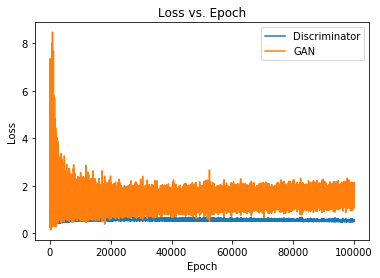

In [ ]:
# Plot model loss vs epoch

plt.plot(training_meta_data[:, 0])
plt.plot(training_meta_data[:, 1])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Discriminator", "GAN"],loc = "upperleft")
plt.show( )

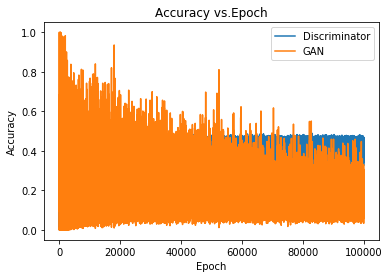

In [ ]:
# Plot accuracy vs epoch

plt.plot(training_meta_data[:, 2])
plt.plot(training_meta_data[:, 3])
plt.title("Accuracy vs.Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Discriminator", "GAN"], loc = "upperleft")
plt.show( )

Answer the following questions:



1.   Why does the accuracy of the discriminator remain around 50%? Is this a good trait of the GAN? 

  ANS: As the generator learns to output "real" images, it becomes more and more difficult for the discriminator to know which images are real and which ones are fake. Once the generator reaches a level of realism, the discriminator begins to classify every image as real, at which point it's accuracy will be 50%, since half of the provided images are from the generator. This could be considered a good trait, since it means the generator is doing such a great job. 


2.   How could this model be modified to produce cleaner (less noisy) images? 

  ANS: If the real images fed into the discriminator were less noisy themselves, the generator would also produce less noisy images. Also, we could try to incorporate dropout layers, a deeper model, non-constant learning rate, or a number of other modifications to have the generator learn even better than we did here. 

#Part 2: Generating samples using trained generator

In [ ]:
# Generate ten images from Gaussian noise using the trained generator from Part 1

noise=np.random.normal(loc=0.0, scale=1.0, size=([10, latent_dim]))
gen_imgs = generator.predict(noise)


# Re-scale generated images to lie in [0, 1]

gen_imgs = 0.5 * gen_imgs + 0.5


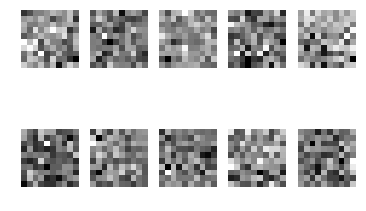

In [ ]:
# Visualize generated noise
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((noise[cnt].reshape(10, 10)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

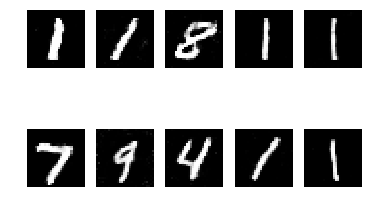

In [ ]:
# Visualize generated samples
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

#Part 3: Testing accuracy of generated images on ten samples

In [ ]:
# Load mnist classifier and generated images
mnist_classifier = load_model('mnist_classifier.h5')

In [ ]:
print(mnist_classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# ASSIGN CLASSES
labels = [1,1,8,1,1,7,9,4,1,1]

# Convert integer labels to one-hot labels 
labels = keras.utils.np_utils.to_categorical(labels, num_classes=10)

# Show classifications

classif=mnist_classifier.evaluate(gen_imgs,labels)
lab=mnist_classifier.metrics_names
labe=mnist_classifier.predict(gen_imgs)
labe = np.round(labe)
print(labe)
# Evaluate accuracy

print("Accuracy : %.2f%%" % (classif[1]*100))



10/10 [==============================] - 0s 347us/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Accuracy : 100.00%


3. a) State the accuracy of the classifier on your ten generated images. Based on this accuracy, would you say your generator does well in producing images
comparable to those in the MNIST dataset of hand-written digits? Why or
why not?

The accuracy is 100%, meaning the default mnist classifier correctly guessed every single generated image. This shows that the generated images are very close to the real deal. 

3. b) In this project, we only tested the performance of the pre-trained classifier on ten samples and used its result to determine the robustness of the generator. How could we better assess the quality of the generated images using this pre-trained classifier and the saved generator?

Instead of testing the pre-trained classifier on ten images, we could test it on a much larger number. The only issue is a human must label the images generated by the generator. 

One way to get around manual labeling could be to re-train the generator with only real images of the number 1, then have it generate 1 images many times to test with the pre-trained network. Then re-train it with the number 2, and so on. This would involve re-training though. 